# A6b

## Name : Aakash Kathirvel

## VID : V01110153

## Date : 25/07/2024

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.api import VAR
from datetime import datetime

In [4]:
# Set the working directory
working_directory = 'C:/Users/Aakash/Desktop/SCMA'
os.chdir(working_directory)

# Verify the working directory
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  C:\Users\Aakash\Desktop\SCMA


In [5]:
# Load the dataset
df = pd.read_excel('commodity_prices.xlsx', sheet_name="Monthly Prices", skiprows=6)

In [6]:
# Rename the first column to "Date"
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [8]:
# Convert the Date column to Date format
# Extract year and month from the string, assuming the format is "YYYYMmm"
df['Date'] = df['Date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%YM%m'))

In [9]:
# Check the DataFrame structure
print(df.head())

        Date  CRUDE_PETRO  CRUDE_BRENT  CRUDE_DUBAI CRUDE_WTI COAL_AUS  \
0 1960-01-01         1.63         1.63         1.63         …        …   
1 1960-02-01         1.63         1.63         1.63         …        …   
2 1960-03-01         1.63         1.63         1.63         …        …   
3 1960-04-01         1.63         1.63         1.63         …        …   
4 1960-05-01         1.63         1.63         1.63         …        …   

  COAL_SAFRICA  NGAS_US  NGAS_EUR NGAS_JP  ...    ALUMINUM  IRON_ORE  COPPER  \
0            …     0.14  0.404774       …  ...  511.471832     11.42  715.40   
1            …     0.14  0.404774       …  ...  511.471832     11.42  728.19   
2            …     0.14  0.404774       …  ...  511.471832     11.42  684.94   
3            …     0.14  0.404774       …  ...  511.471832     11.42  723.11   
4            …     0.14  0.404774       …  ...  511.471832     11.42  684.75   

    LEAD     Tin  NICKEL   Zinc   GOLD  PLATINUM  SILVER  
0  206.1  2180.

In [10]:
# Select specific columns (Date and selected commodities)
commodity = df[['Date', df.columns[2], df.columns[24], df.columns[69], df.columns[71], df.columns[60], df.columns[30]]]
commodity.columns = ['Date', 'Commodity1', 'Commodity2', 'Commodity3', 'Commodity4', 'Commodity5', 'Commodity6']

In [11]:
# Remove the Date column for analysis
commodity_data = commodity.drop(columns=['Date'])

In [12]:
# Column names to test (if you want to specify particular columns)
columns_to_test = commodity_data.columns

In [13]:
# Initialize counters and lists for stationary and non-stationary columns
non_stationary_count = 0
stationary_columns = []
non_stationary_columns = []

In [16]:
# Loop through each column and perform the ADF test
for col in columns_to_test:
    adf_result = adfuller(commodity_data[col].dropna())
    p_value = adf_result[1]  # Extract p-value for the test
    print(f"\nADF test result for column: {col}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {p_value}")
    print(f"Critical Values: {adf_result[4]}")
    
    # Check if the p-value is greater than 0.05 (commonly used threshold)
    if p_value > 0.05:
        non_stationary_count += 1
        non_stationary_columns.append(col)
    else:
        stationary_columns.append(col)


ADF test result for column: Commodity1
ADF Statistic: -1.5078661910935343
p-value: 0.5296165197702398
Critical Values: {'1%': -3.439006442437876, '5%': -2.865360521688131, '10%': -2.5688044403756587}

ADF test result for column: Commodity2
ADF Statistic: -2.4231464527418902
p-value: 0.1353097742779038
Critical Values: {'1%': -3.4388599939707056, '5%': -2.865295977855759, '10%': -2.5687700561872413}

ADF test result for column: Commodity3
ADF Statistic: 1.3430517021933006
p-value: 0.9968394353612382
Critical Values: {'1%': -3.4389608473398194, '5%': -2.8653404270188476, '10%': -2.568793735369693}

ADF test result for column: Commodity4
ADF Statistic: -1.397294710746222
p-value: 0.5835723787985764
Critical Values: {'1%': -3.438915730045254, '5%': -2.8653205426302253, '10%': -2.5687831424305845}

ADF test result for column: Commodity5
ADF Statistic: -2.5101716315209086
p-value: 0.11301903181624645
Critical Values: {'1%': -3.439006442437876, '5%': -2.865360521688131, '10%': -2.56880444037

In [17]:
# Print the number of non-stationary columns and the lists of stationary and non-stationary columns
print(f"\nNumber of non-stationary columns: {non_stationary_count}")
print(f"Non-stationary columns: {non_stationary_columns}")
print(f"Stationary columns: {stationary_columns}")


Number of non-stationary columns: 6
Non-stationary columns: ['Commodity1', 'Commodity2', 'Commodity3', 'Commodity4', 'Commodity5', 'Commodity6']
Stationary columns: []


In [18]:
# Co-Integration Test (Johansen's Test)
# Determining the number of lags to use (you can use information criteria like AIC, BIC)
model = VAR(commodity_data)
lags = model.select_order(maxlags=10)
lag_length = lags.aic

In [19]:
# Perform Johansen co-integration test
coint_test = coint_johansen(commodity_data, det_order=0, k_ar_diff=lag_length)
print(coint_test.lr1)  # Trace statistic
print(coint_test.cvt)  # Critical values

[176.46252708 104.96585715  67.84627098  37.39727549  16.60719811
   5.3013434 ]
[[ 91.109   95.7542 104.9637]
 [ 65.8202  69.8189  77.8202]
 [ 44.4929  47.8545  54.6815]
 [ 27.0669  29.7961  35.4628]
 [ 13.4294  15.4943  19.9349]
 [  2.7055   3.8415   6.6349]]


In [21]:
# Determine the number of co-integrating relationships (r) based on the test
r = sum(coint_test.lr1 > coint_test.cvt[:, 1])  # Replace with the actual number from the test results

Det. terms outside the coint. relation & lagged endog. parameters for equation Commodity1
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5111      0.472     -1.083      0.279      -1.436       0.414
L1.Commodity1     0.3290      0.038      8.553      0.000       0.254       0.404
L1.Commodity2     0.0065      0.008      0.828      0.408      -0.009       0.022
L1.Commodity3     0.0005      0.006      0.071      0.944      -0.012       0.013
L1.Commodity4    -0.0883      0.162     -0.546      0.585      -0.405       0.229
L1.Commodity5    -0.0059      0.005     -1.211      0.226      -0.015       0.004
L1.Commodity6     0.0210      0.017      1.212      0.226      -0.013       0.055
L2.Commodity1    -0.0366      0.041     -0.901      0.368      -0.116       0.043
L2.Commodity2     0.0136      0.008      1.773      0.076      -0.001       0.029
L2.Commo

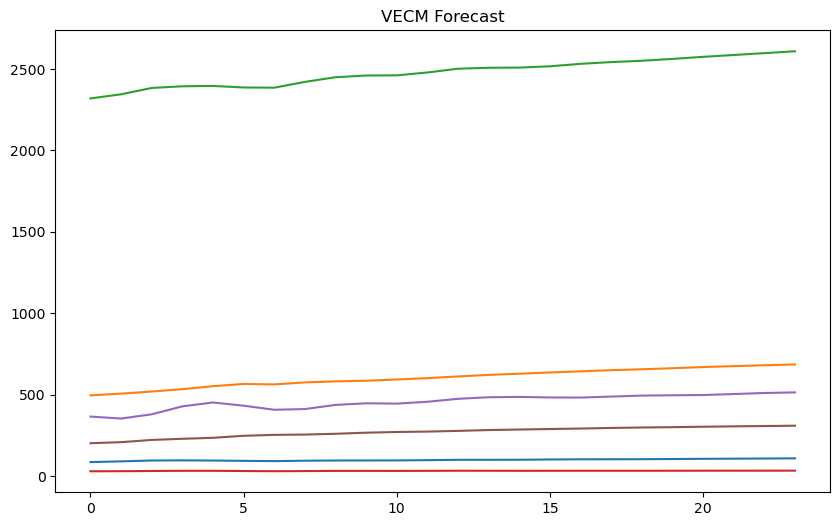

[[  85.91762827  495.67905179 2319.8108355    29.49151698  365.5165927
   201.93061203]
 [  90.44776345  506.45488961 2345.29708704   29.95253173  353.43826877
   208.3255907 ]
 [  95.66038428  519.38034599 2384.15095934   31.30299808  379.42689949
   222.08132556]
 [  96.43973899  533.92130494 2394.40072214   32.419048    428.32121932
   228.97214718]
 [  95.46875966  552.2424112  2396.54540874   32.41619694  452.13154495
   235.07571751]
 [  93.57266199  565.88265035 2387.25199185   31.05866169  432.34645772
   247.40034428]
 [  91.85084996  563.13154902 2385.84141652   29.91495553  407.42921951
   253.1632003 ]
 [  94.33490806  575.39462001 2421.44991929   30.83231913  411.6712742
   255.01040739]
 [  95.72959328  581.81044915 2450.04764763   31.81138777  437.14485878
   259.86954476]
 [  95.92424971  585.62121907 2460.63852898   31.92352639  447.14303892
   266.60895599]
 [  96.14183274  593.2898006  2461.60200516   31.70511219  445.08997622
   270.84829726]
 [  97.72149586  601.57

In [22]:
if r > 0:
    # If co-integration exists, estimate the VECM model
    vecm_model = VECM(commodity_data, k_ar_diff=lag_length, coint_rank=r, deterministic='co')
    vecm_result = vecm_model.fit()
    
    # Summary of the VECM model
    print(vecm_result.summary())
    
    # Forecasting using the VECM model
    # Forecasting 24 steps ahead
    forecast = vecm_result.predict(steps=24)
    
    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(forecast)
    plt.title('VECM Forecast')
    plt.show()

else:
    # If no co-integration exists, proceed with Unrestricted VAR Analysis
    var_model = VAR(commodity_data)
    var_result = var_model.fit(lag_length)
    
    # Summary of the VAR model
    print(var_result.summary())
    
    # Granger causality test
    causality_results = var_result.test_causality(causing='Commodity1', caused='Commodity2')
    print(causality_results.summary())
    
    # Forecasting using the VAR model
    forecast = var_result.forecast(commodity_data.values[-lag_length:], steps=24)
    
    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    for i in range(forecast.shape[1]):
        plt.plot(forecast[:, i], label=f'Forecast {commodity_data.columns[i]}')
    plt.title('VAR Forecast')
    plt.legend()
    plt.show()

print(forecast)